Number of duplicate index values: 1
Duplicate index values found:
            exposed_(mn)  displaced_(k)  killed  duration(days)
flood                                                          
2011-11-09      211743.0          15000       0              41
2011-11-09         112.0          10000       4               6


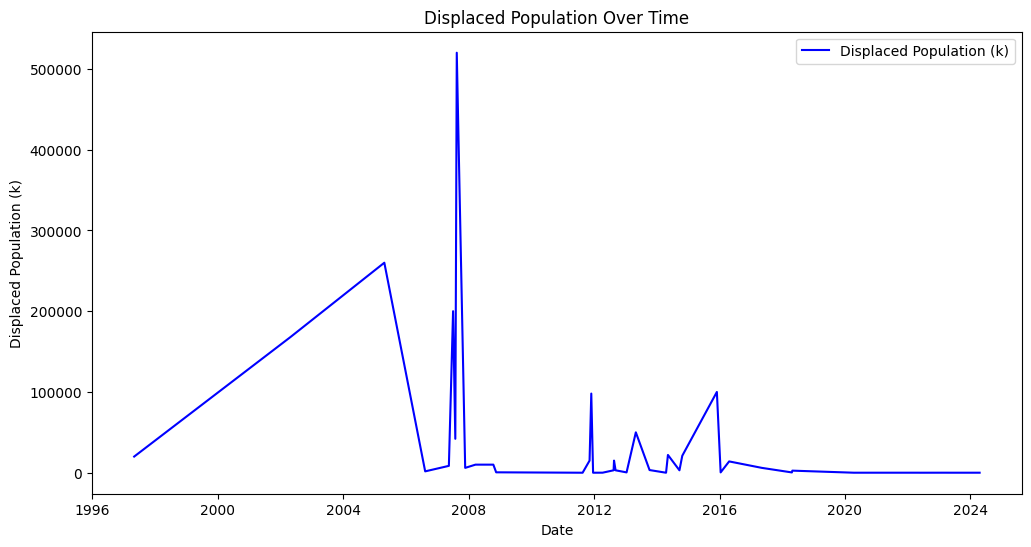

ADF Statistic: -1.759801661535082
p-value: 0.40059364825287846
Critical Values:
  1%: -3.626651907578875
  5%: -2.9459512825788754
  10%: -2.6116707716049383
                               SARIMAX Results                                
Dep. Variable:          displaced_(k)   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -540.494
Date:                Wed, 16 Oct 2024   AIC                           1086.988
Time:                        21:18:14   BIC                           1092.201
Sample:                             0   HQIC                          1088.899
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0972      0.143     -0.678      0.4

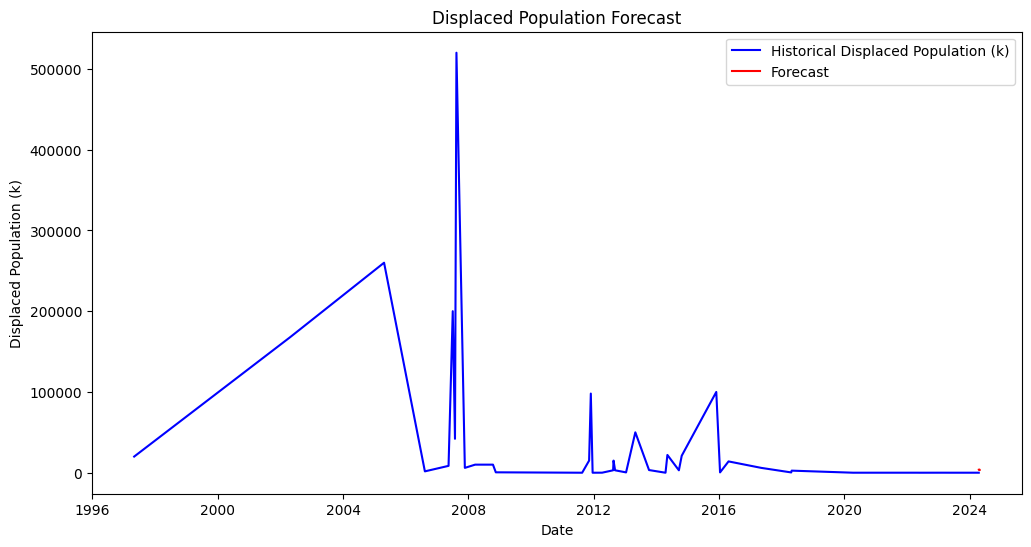

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings('ignore')

# Load your flood data
data_path = '../data/processed/cleaned_flood_data.csv'
flood_data = pd.read_csv(data_path)

# Step 2: Preprocessing
flood_data['flood'] = pd.to_datetime(flood_data['flood'])  # Convert to datetime
flood_data.set_index('flood', inplace=True)  # Set date as index

# Check for duplicate index values
duplicates = flood_data.index.duplicated().sum()
print(f"Number of duplicate index values: {duplicates}")

if duplicates > 0:
    print("Duplicate index values found:")
    print(flood_data[flood_data.index.duplicated(keep=False)])
    # Remove duplicates (choose one of the methods mentioned above)
    flood_data = flood_data[~flood_data.index.duplicated(keep='first')]

# Step 3: Exploratory Data Analysis
plt.figure(figsize=(12, 6))
plt.plot(flood_data['displaced_(k)'], label='Displaced Population (k)', color='blue')
plt.title('Displaced Population Over Time')
plt.xlabel('Date')
plt.ylabel('Displaced Population (k)')
plt.legend()
plt.show()

# Step 4: Stationarity Check
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'  {key}: {value}')

# Perform stationarity test
test_stationarity(flood_data['displaced_(k)'])

# Apply differencing if the series is non-stationary
flood_data['displaced_diff'] = flood_data['displaced_(k)'].diff()

# Step 5: ARIMA Model Fitting
model = ARIMA(flood_data['displaced_(k)'].dropna(), order=(1, 1, 1))  # Example order (p=1, d=1, q=1)
model_fit = model.fit()
print(model_fit.summary())

# Step 6: Forecasting
forecast = model_fit.forecast(steps=10)  # Forecast next 10 time steps
print("Forecasted Displaced Population (k):")
print(forecast)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(flood_data['displaced_(k)'], label='Historical Displaced Population (k)', color='blue')
plt.plot(pd.date_range(start=flood_data.index[-1] + pd.Timedelta(days=1), periods=10), forecast, label='Forecast', color='red')
plt.title('Displaced Population Forecast')
plt.xlabel('Date')
plt.ylabel('Displaced Population (k)')
plt.legend()
plt.show()